# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,RocCurveDisplay

In [2]:
##from src.call import call_on_students

ModuleNotFoundError: No module named 'src'

## Part 1: Gradient Descent

### Set Up

In [3]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [4]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


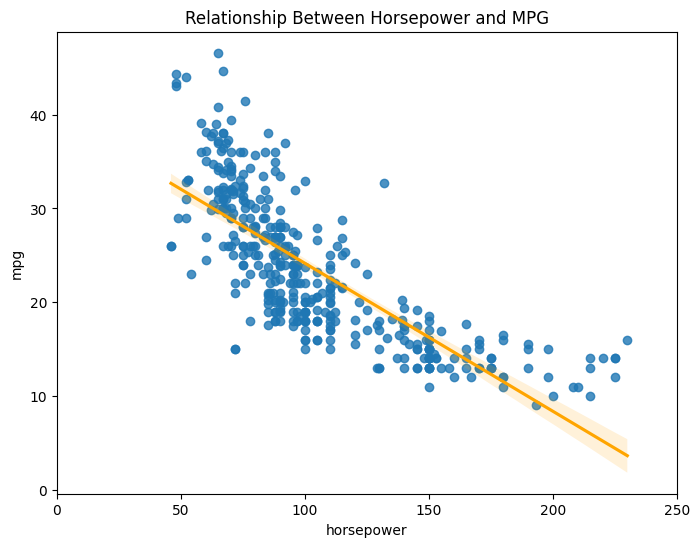

In [5]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [ ]:
# call_on_students(1)

#### Answer: 

- This is the cost function of the residual sum of squares of the model plotted above


### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

In [ ]:
# call_on_students(1)

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [ ]:
# call_on_students(1)

#### Answer: 

- The step size is determined by alpha and it tell us how fast are we moving towards the bottom of our loss function
- The learning rate is a small number that multiplies the alpha as we go down to prevent it to move too fast when we're getting close to the bottom


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [ ]:
# call_on_students(1)

#### Answer: 

- The Logistic Regression model, is a kind of classification model.
- It outputs discrete values
- Is different from linear regressions because the target is discrete and not continuous.
- Is a parametric model


### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [ ]:
# call_on_students(1)

#### Answer: 

- It depends on what is your final goal.
- If you need to predict whether something belows to a category or not, you'd have to use either logistic regression or decision tree classifier for that.
- If you goal is to determine how much of something, then you'd have to use a linear regression model, a logistic regression one won't be useful in this case.


## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [6]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [7]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [ ]:
# call_on_students(1)

In [9]:
# Train-test split
# Set test_size=0.33 and random_state=42
X = mpg_class.drop('target',axis=1)
y = mpg_class['target']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [11]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [ ]:
# call_on_students(1)

#### Part 1: explore the target column breakdown in train data

In [15]:
# Code to explore
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))

target
0    195
1     67
Name: count, dtype: int64
target
0    0.744275
1    0.255725
Name: proportion, dtype: float64


#### Answer:

-  Our target is not balanced, we have around  25.6% of the target as 1 and 74.4% as 0, so, that tell us right away that accuracy won't be a good model.


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- A model-less baseline would be just guessing that that all our targets equal to 0, which will give us a 74% accuracy


#### Part 3: How accurate would that baseline be on test data?


In [16]:
# Code to find the answer
y_test.value_counts(normalize=True)

target
0    0.753846
1    0.246154
Name: proportion, dtype: float64

#### Answer:

- It'll close to rality since in the test data we have 75.3% 0 and 24.6% 1, which it has a difference of less than 1% with the training model


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [ ]:
# call_on_students(1)

#### Answer:

- The main problem is that based on the imbalance of the data, accuracy won't be helpful to assess how good our model is.
- To solve this problem, we'd either have to balance the data somehow, either by downsampling or upsampling, or just opotimize for different metrics in our model, such as recall or precision


### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [ ]:
# call_on_students(1)

In [18]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state = 42)
model_log = logreg.fit(X_train_scaled, y_train)
y_hat_test = logreg.predict(X_test_scaled)

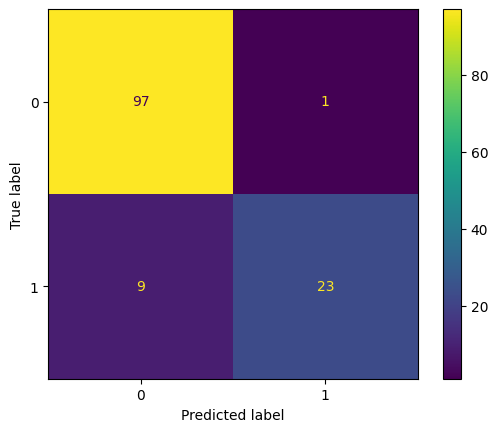

In [21]:
# Plot a confusion matrix on the test data
ConfusionMatrixDisplay.from_estimator(logreg, X_test_scaled, y_test);


### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [ ]:
# call_on_students(1)

In [22]:
# Accuracy
mod_accuracy = accuracy_score(y_test,y_hat_test)
mod_accuracy


0.9230769230769231

In [23]:
# Precision
mod_precision = precision_score(y_test,y_hat_test)
mod_precision

0.9583333333333334

In [24]:
# Recall
mod_recall = recall_score(y_test,y_hat_test)
mod_recall

0.71875

In [25]:
# F1-Score
mod_af1 = f1_score(y_test,y_hat_test)
mod_af1

0.8214285714285714

### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [ ]:
# call_on_students(1)

In [51]:
# Calculate roc-auc
y_score = model_log.decision_function(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
print(F" AUC: {roc_auc_score(y_test, y_score)}")


 AUC: 0.9811862244897959


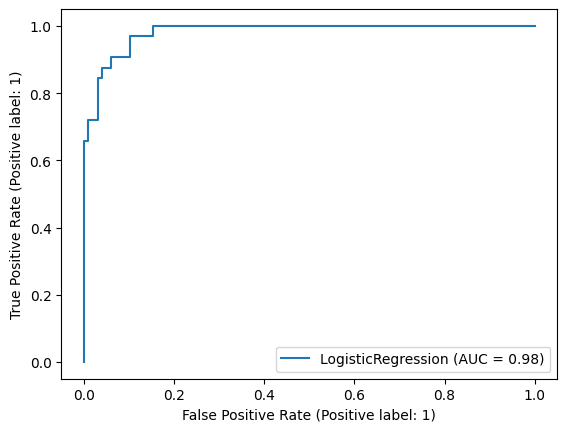

In [52]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(logreg, X_test_scaled,y_test);

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [ ]:
# call_on_students(1)

#### Answer:

- It performs better than our baseless model. It shows an increase of accuracy, as well as a high score on the other metrics.


## Part 4: Decision Trees

### Set Up - Generating 1-split trees to compare

In [28]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

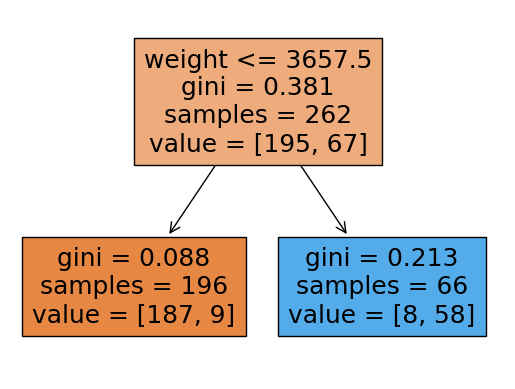

In [29]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, feature_names=['weight'], filled=True);

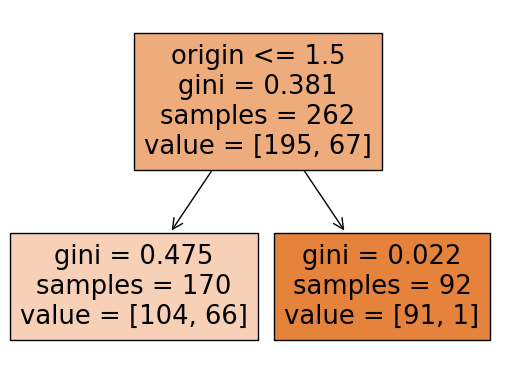

In [30]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, feature_names=['origin'], filled=True);

#### Result: 

(showing the image output incase there is a problem with the above code to generate and visualize these trees)

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [49]:
# call_on_students(1)
print(f"Information gain of version 1 {abs(0.088+0.213-0.381)}")
print(f"Information gain of version 2 {abs(0.475+0.022-0.381)}")

Information gain of version 1 0.08000000000000002
Information gain of version 2 0.11599999999999999


#### Answer:

- The 2nd version does a better job, because it has a higher information gain than the version 1

- Actually the second is the best one becuse the ginis are lower at the end in comparisongwith the model 2


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [ ]:
# call_on_students(1)

In [62]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(criterion = 'gini',random_state=42)

dt.fit(X_train_scaled, y_train)
y_hat_test = dt.predict(X_test_scaled)

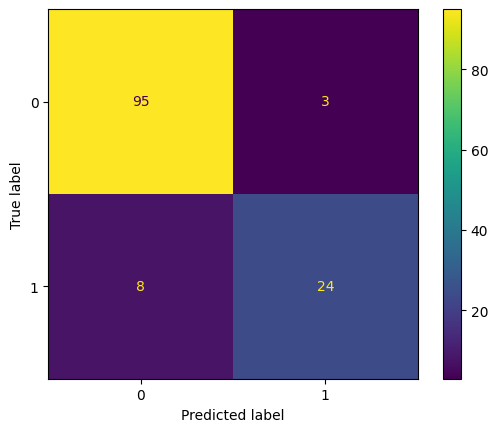

In [65]:
# Plot a confusion matrix on the test data
ConfusionMatrixDisplay.from_estimator(dt,X_test_scaled, y_test);

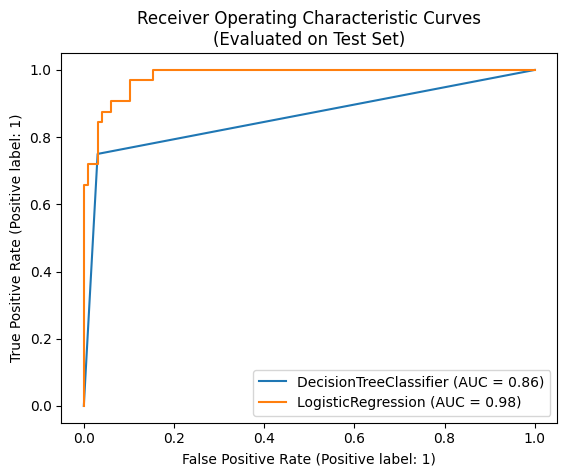

In [64]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(dt, X_test_scaled, y_test, ax=ax)
RocCurveDisplay.from_estimator(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- The Logistic Regression model works way better because it has more area under the curve than the DesicionTreeClassifier.
